In [4]:
import matplotlib.pyplot as plt
import time
from Params import *
from WIMPFuncs import *
from numpy import *
from LabFuncs import *
from Like import *

m_vals = logspace(log10(0.5),3.0,50)
sigma_vals = logspace(-49.0,-40.0,500)
Volume = 1000.0
TotTime = 3.0
fname = ["" for x in range(0,8)]
fname[0] ="Ideal"
fname[1] ="Pixel"
fname[2] ="Strip"
fname[3] ="Optical"
fname[4] ="Wire"
fname[5] ="Pad"
fname[6] ="Planar"
fname[7] ="Nondirectional"

t0 = time.time()
for i in range(0,8):
    t1 = time.time()
    DLHe,DLF = CYGNUSLimit("test/CYGNUS1000-"+fname[i]+".txt",m_vals,sigma_vals,Volume,TotTime,nt = 10,nside=8, ReadOut_Name=fname[i],Verbose=True)
    t2 = time.time()
    print '>>>Limit Time:',t2-t1

print 'Total Time:',t0-t2


CYGNUS limits:test/CYGNUS1000-Ideal.txt
Helium...
m_chi =  0.5 | sigma_p =  0.0 | # Signal =  0.0 | # Background =  8.45644264591
m_chi =  0.583899311869 | sigma_p =  0.0 | # Signal =  0.0 | # Background =  8.45644264591
m_chi =  0.681876812802 | sigma_p =  0.0 | # Signal =  0.0 | # Background =  8.45644264591
m_chi =  0.796294803549 | sigma_p =  0.0 | # Signal =  0.0 | # Background =  8.45644264591
m_chi =  0.929911975673 | sigma_p =  3.75967496579e-42 | # Signal =  0.533391702558 | # Background =  8.45644264591
m_chi =  1.08594992539 | sigma_p =  2.74712078927e-43 | # Signal =  0.584959028276 | # Background =  8.45644264591
m_chi =  1.26817082832 | sigma_p =  6.69346971296e-44 | # Signal =  0.637700929382 | # Background =  8.45644264591
m_chi =  1.48096814797 | sigma_p =  2.57526332677e-44 | # Signal =  0.662670045102 | # Background =  8.45644264591


KeyboardInterrupt: 

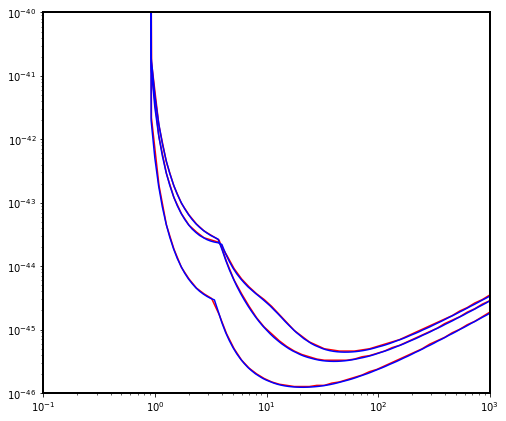

In [2]:
# PLOT
plt.rcParams['axes.linewidth'] = 2
fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111)


data = loadtxt("test/CYGNUS1000-Nondirectional.txt")
m,F,He = data[0,:], data[1,:], data[2,:]
He[He==0] = 1
F[F==0] = 1
plt.loglog(m,minimum(He,F),'r-')

data = loadtxt("test/CYGNUS1000-Ideal.txt")
m,F,He = data[0,:], data[1,:], data[2,:]
He[He==0] = 1
F[F==0] = 1
plt.loglog(m,minimum(He,F),'r-')

data = loadtxt("test/CYGNUS1000-Pixel.txt")
m,F,He = data[0,:], data[1,:], data[2,:]
He[He==0] = 1
F[F==0] = 1
plt.loglog(m,minimum(He,F),'r-')


data = loadtxt("../data/CYGNUS1000-Nondirectional.txt")
m,F,He = data[0,:], data[1,:], data[2,:]
He[He==0] = 1
F[F==0] = 1
plt.loglog(m,minimum(He,F),'b-')

data = loadtxt("../data/CYGNUS1000-Ideal.txt")
m,F,He = data[0,:], data[1,:], data[2,:]
He[He==0] = 1
F[F==0] = 1
plt.loglog(m,minimum(He,F),'b-')

data = loadtxt("../data/CYGNUS1000-Pixel.txt")
m,F,He = data[0,:], data[1,:], data[2,:]
He[He==0] = 1
F[F==0] = 1
plt.loglog(m,minimum(He,F),'b-')


xmin = 0.1
xmax = 1.0e3
ymax = 1.0e-40
ymin = 1.0e-46
ax.set_xlim(left=xmin, right=xmax)
ax.set_ylim(bottom=ymin, top=ymax)

plt.show()

In [ ]:
nam

HaloModel = SHM
Expt = Params.Detector(1.8,200.0,Params.He4,Loc,0.16*3,ne=20,nt=1,nside=0,ReadOut_Name = nam)

sigma_p = 1.0e-45
m_chi = 10.0
Signal = Params.WIMP(m_chi,1.0e-45)
RD_wimp = LabFuncs.BinEvents(Expt,WIMPFuncs.WIMPRate,Signal,HaloModel)
Signal.RecoilDistribution(RD_wimp/1.0e-45)
        
Background = NeutrinoFuncs.GetNuFluxes(Expt.EnergyThreshold,Expt.Nucleus)
n_bg = Background.NumberOfNeutrinos
R_bg = Background.Normalisations
R_bg_err = Background.Uncertainties
RD_nu = zeros(shape=(Expt.TotalNumberOfBins,n_bg))
for i in range(0,n_bg):
    RD_nu[:,i] = LabFuncs.BinEvents(Expt,NeutrinoFuncs.NuRate,Background,i)
    RD_nu[:,i] *= (1.0/R_bg[i])
Background.RecoilDistribution(RD_nu)
X_in1 = zeros(shape=(n_bg+1))
N_bg = zeros(shape=Expt.TotalNumberOfBins)
for i in range(0,n_bg):
    N_bg = N_bg + R_bg[i]*Background.RD[:,i]
    
    

N_signal = Signal.RD*sigma_p
N_obs = N_signal + N_bg

X_in1 = append(log10(sigma_p),R_bg)
L1 = llhood1(X_in1,N_obs,Signal,Background)
print(L1)

X_in0 = R_bg
L0 = llhood0(X_in0,N_obs,Signal,Background)
print(L0)
print 2*(L0-L1)

In [ ]:
lnGF(Background.Normalisations,Background.Normalisations,Background.Uncertainties*Background.Normalisations)

In [ ]:
Background.Uncertainties*Background.Normalisations